In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd

In [2]:
data_dir="/content/drive/MyDrive/alzeihmer"

In [3]:
train_data=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [30]:
train_gen=train_data.flow_from_directory('/content/drive/MyDrive/alzeihmer/train',target_size=(150,150),batch_size=32,class_mode='categorical',subset='training')

Found 184 images belonging to 4 classes.


In [31]:
val_gen=train_data.flow_from_directory('/content/drive/MyDrive/alzeihmer/train',target_size=(150,150),batch_size=32,class_mode='categorical',subset='validation')

Found 45 images belonging to 4 classes.


In [36]:
model=keras.Sequential([ layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(32,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(32,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(128,activation='relu'),
                        layers.Dense(4,activation='softmax')






                         ])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,198,724 (4.57 MB)

 Trainable params: 1,198,724 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
classindices=train_gen.class_indices
classnames=list(classindices.keys())

print("class indices",classindices)
print("classname",classnames)

class indices {'mild': 0, 'moderate': 1, 'non': 2, 'very mild': 3}
classname ['mild', 'moderate', 'non', 'very mild']


In [40]:
model.fit(train_gen,epochs=1,validation_data=val_gen,batch_size=32)

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 792ms/step - accuracy: 0.2878 - loss: 1.4518 - val_accuracy: 0.4444 - val_loss: 1.3597


In [41]:
model.save('/content/drive/MyDrive/alzeihmer/model.h5')

In [42]:
model=load_model('/content/drive/MyDrive/alzeihmer/model.h5')
print('model loaded')

model loaded


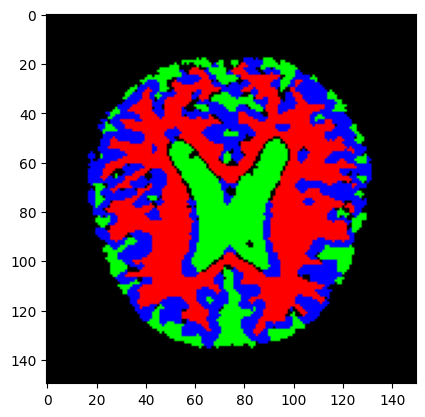

In [43]:
test_image='/content/drive/MyDrive/alzeihmer/test/mild/mildDem10.png'
img=image.load_img(test_image,target_size=(150,150))
plt.imshow(img)
plt.axis()
plt.show()

In [44]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [45]:
predict=model.predict(img_array)
ind=np.argmax(predict)
predict=predict[0][ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [48]:
predict_class=classnames[ind]
print("predicted class:",predict_class)
if predict_class =="NonDemented":
  print("you have no alzeihmer")
else:
  print("you have alzeihmer")

predicted class: mild
you have alzeihmer
